-Took almost a day to load in the data

-Took so long for training

-Start train performance is only ard 10%

-Validation loss < Training loss

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.append('/home/r8user2/fastai/old')
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
import matplotlib.pyplot as plt
import timeit

In [2]:
# Selected data
#PATH = '/home/r8user2/Documents/HY/dress_data/alex_workplace/dressdata_project/git_workplace/selected_gd_data_5'
# Full data
PATH = '/home/r8user2/Documents/HY/dress_data/datasets'
sz = 422
arch = resnext101_64

In [3]:
# Data augmentation
tfms = tfms_from_model(resnext101_64, 
                       sz, 
                       # transform_top_down: flip vertically
                       # transform_side_on: flip horizontally
                       aug_tfms = transforms_side_on,
                       max_zoom = 1.1)

In [4]:
data = ImageClassifierData.from_paths(path = PATH,
                                      tfms = tfms,
                                      trn_name = 'imgtrain',
                                      val_name = 'imgval',
                                      # utilize CPUs in remote
                                      num_workers = 60)
learn = ConvLearner.pretrained(arch, data, precompute = True)

100%|██████████| 939/939 [1:57:37<00:00,  5.69s/it]  


In [5]:
learn.save('temp_resnext101')

In [6]:
# Find optimal learning rate
learn.lr_find(1e-5, 1e-1)

epoch      trn_loss   val_loss   accuracy                     
    0      4.36935    4.224544   0.10896   



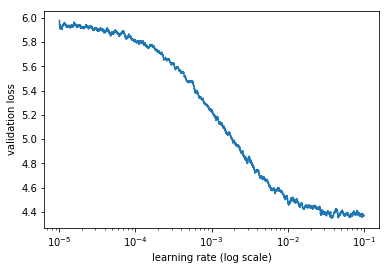

In [ ]:
learn.sched.plot()

In [ ]:
# Raw train a few rounds
start = timeit.timeit()
learn.load('temp_resnext101')
learn.fit(1e-3, 4)
end = timeit.timeit()
print('%d mins '% ((end - start)/60))

epoch      trn_loss   val_loss   accuracy                     
    0      4.455915   4.203832   0.122211  
    1      4.262825   4.041487   0.14149                      
    2      4.154855   3.956736   0.153842                     
    3      4.060721   3.891838   0.162383                     

0 mins 


In [ ]:
learn.save('temp_resnext101')

In [ ]:
# Further train with cosine increasing annealing (and data augmentation)
start = timeit.timeit()
learn.precompute = False
learn.fit(1e-3, 4, cycle_len = 1, cycle_mult = 2)
end = timeit.timeit()
learn.precompute = True
print('%d mins' % ((end-start)/60))

 30%|███       | 2231/7435 [5:24:03<11:03:50,  7.65s/it, loss=4.08]

In [ ]:
# Further train with cosine constant annealing (and data augmentation)
start = timeit.timeit()
learn.load('temp_resnext101')
learn.precompute = False
learn.fit(1e-3, 15, cycle_len = 1)
end = timeit.timeit()
learn.precompute = True
print('%d mins' % ((end-start)/60))

In [ ]:
# Further train with differential learning and constant annealing
lrs = np.array([1e-5, 1e-4, 1e-3])
learn.load('temp_resnext101')
learn.unfreeze()
start = timeit.timeit()
learn.fit(lrs, 7, cycle_len = 1)
end = timeit.timeit()
print('%d mins' % ((end-start)/60))

In [ ]:
# Further train with differential learning and increasing annealing
learn.precompute = True
learn.load('temp_resnext101')
learn.unfreeze()
start = timeit.timeit()
learn.fit(lrs, 3, cycle_len = 1, cycle_mult = 2)
end = timeit.timeit()
print('%d mins' % ((end-start)/60))